# Sección 11: Aplicaciones Avanzadas de las Derivadas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, diff, Eq, solve, sin, cos, tan, sqrt

# Configuración
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## 1. Líneas Tangentes

**Ecuación de la línea tangente**:
$y = f(a) + f'(a)(x - a)$

### Implementación con visualización

=== Línea Tangente ===
Función original: f(x) = 6*x**2 - 2*x + 5
Punto de tangencia: x = 4
f(4) = 93
f'(4) = 46

Ecuación de la línea tangente:
Forma punto-pendiente: y = 93 + 46(x - 4)
Forma simplificada: y = 46*x - 91


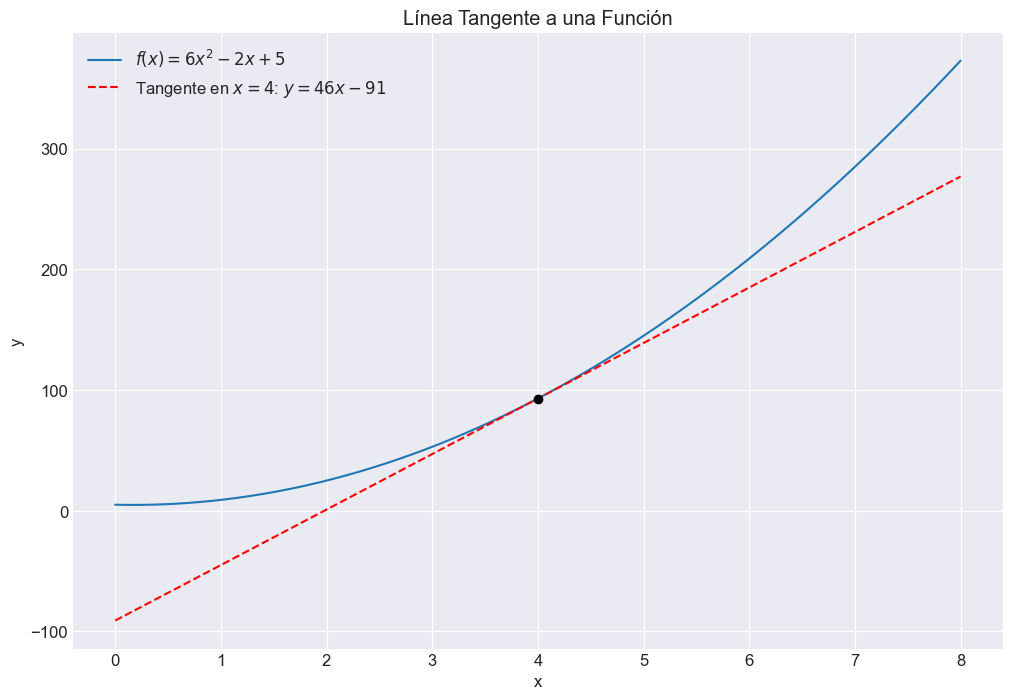

In [3]:
def tangent_line_example():
    x = symbols('x')
    f = 6*x**2 - 2*x + 5  # Función del ejemplo del PDF
    a = 4  # Punto de tangencia del ejemplo
    
    # Calcular componentes
    f_a = f.subs(x, a)
    f_prime = diff(f, x)
    f_prime_a = f_prime.subs(x, a)
    
    # Ecuación de la línea tangente
    tangent_eq = f_a + f_prime_a*(x - a)
    tangent_eq_simplified = tangent_eq.expand()
    
    print("=== Línea Tangente ===")
    print(f"Función original: f(x) = {f}")
    print(f"Punto de tangencia: x = {a}")
    print(f"f({a}) = {f_a}")
    print(f"f'({a}) = {f_prime_a}")
    print(f"\nEcuación de la línea tangente:")
    print(f"Forma punto-pendiente: y = {f_a} + {f_prime_a}(x - {a})")
    print(f"Forma simplificada: y = {tangent_eq_simplified}")
    
    # Visualización
    x_vals = np.linspace(0, 8, 500)
    f_lamb = sp.lambdify(x, f, 'numpy')
    tangent_lamb = sp.lambdify(x, tangent_eq, 'numpy')
    
    plt.figure()
    plt.plot(x_vals, f_lamb(x_vals), label=f'$f(x) = {sp.latex(f)}$')
    plt.plot(x_vals, tangent_lamb(x_vals), 'r--', 
             label=f'Tangente en $x={a}$: $y = {sp.latex(tangent_eq_simplified)}$')
    plt.scatter([a], [f_a], color='black', zorder=5)
    plt.title('Línea Tangente a una Función')
    plt.legend()
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

tangent_line_example()

## 2. Líneas Normales

**Ecuación de la línea normal**:
$y = f(a) - \frac{1}{f'(a)}(x - a)$

### Implementación con verificación de perpendicularidad


=== Línea Normal ===
Función original: f(x) = 6*x**2 + 3
Punto dado: x = 1
f(1) = 9
f'(1) = 12
Pendiente normal: m = -1/12

Ecuación de la línea normal:
Forma punto-pendiente: y = 9 - 1/12(x - 1)
Forma simplificada: y = 109/12 - x/12

Verificación: Producto de pendientes = -1 (debe ser -1)


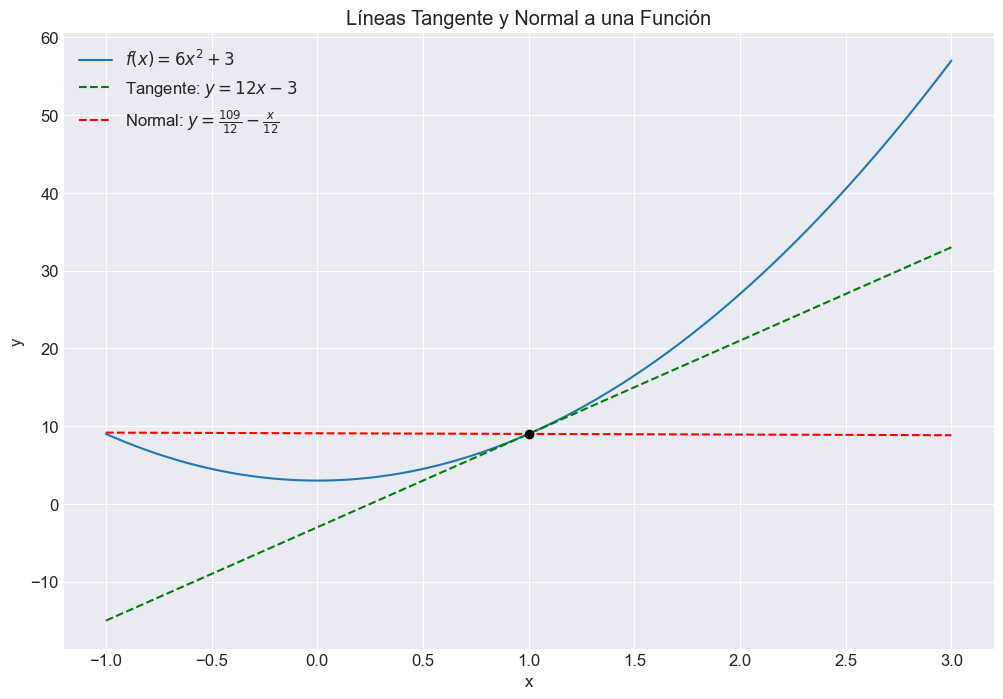

In [6]:
def normal_line_example():
    x = symbols('x')
    f = 6*x**2 + 3  # Función del ejemplo del PDF
    a = 1  # Punto dado
    
    # Calcular componentes
    f_a = f.subs(x, a)
    f_prime = diff(f, x)
    f_prime_a = f_prime.subs(x, a)
    
    # Pendiente de la normal
    m_normal = -1/f_prime_a # type: ignore
    
    # Ecuación de la línea normal
    normal_eq = f_a + m_normal*(x - a)
    normal_eq_simplified = normal_eq.expand()
    
    print("\n=== Línea Normal ===")
    print(f"Función original: f(x) = {f}")
    print(f"Punto dado: x = {a}")
    print(f"f({a}) = {f_a}")
    print(f"f'({a}) = {f_prime_a}")
    print(f"Pendiente normal: m = {m_normal}")
    print(f"\nEcuación de la línea normal:")
    print(f"Forma punto-pendiente: y = {f_a} - {abs(m_normal)}(x - {a})")
    print(f"Forma simplificada: y = {normal_eq_simplified}")
    
    # Verificación de perpendicularidad
    tangent_eq = f_a + f_prime_a*(x - a)
    product_slopes = f_prime_a * m_normal
    print(f"\nVerificación: Producto de pendientes = {product_slopes} (debe ser -1)")
    
    # Visualización
    x_vals = np.linspace(-1, 3, 500)
    f_lamb = sp.lambdify(x, f, 'numpy')
    tangent_lamb = sp.lambdify(x, tangent_eq, 'numpy')
    normal_lamb = sp.lambdify(x, normal_eq, 'numpy')
    
    plt.figure()
    plt.plot(x_vals, f_lamb(x_vals), label=f'$f(x) = {sp.latex(f)}$')
    plt.plot(x_vals, tangent_lamb(x_vals), 'g--', 
             label=f'Tangente: $y = {sp.latex(tangent_eq.expand())}$')
    plt.plot(x_vals, normal_lamb(x_vals), 'r--', 
             label=f'Normal: $y = {sp.latex(normal_eq_simplified)}$')
    plt.scatter([a], [f_a], color='black', zorder=5)
    plt.title('Líneas Tangente y Normal a una Función')
    plt.legend()
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

normal_line_example()

## 3. Valores que Hacen Tangentes Paralelas

**Condición para tangentes paralelas**:
$f'(a) = f'(b)$

### Implementación con solución algebraica

## 4. Valores que Hacen una Función Diferenciable

**Condiciones para diferenciabilidad**:
1. Continuidad en el punto: $\lim_{x \to a^-} f(x) = \lim_{x \to a^+} f(x) = f(a)$
2. Derivadas laterales iguales: $\lim_{x \to a^-} f'(x) = \lim_{x \to a^+} f'(x)$

### Implementación con sistema de ecuaciones

In [7]:
def differentiable_function_example():
    x, a, b = symbols('x a b')
    # Función del ejemplo del PDF
    f1 = 2*x**2 - a*x + b  # Para x ≤ 1
    f2 = 3*x**3 - x**2 - 6  # Para x > 1
    break_point = 1
    
    # Condición 1: Continuidad
    lim_left = f1.subs(x, break_point)
    lim_right = f2.subs(x, break_point)
    eq_continuity = Eq(lim_left, lim_right)
    
    # Condición 2: Derivadas iguales
    f1_prime = diff(f1, x)
    f2_prime = diff(f2, x)
    lim_prime_left = f1_prime.subs(x, break_point)
    lim_prime_right = f2_prime.subs(x, break_point)
    eq_derivative = Eq(lim_prime_left, lim_prime_right)
    
    # Resolver sistema
    solution = solve((eq_continuity, eq_derivative), (a, b))
    
    print("\n=== Función Diferenciable ===")
    print(f"Función definida por partes:")
    print(f"Para x ≤ {break_point}: f(x) = {f1}")
    print(f"Para x > {break_point}: f(x) = {f2}")
    print("\nCondición de continuidad en x=1:")
    print(f"Límite izquierdo: {lim_left}")
    print(f"Límite derecho: {lim_right}")
    print(f"Ecuación: {eq_continuity}")
    print("\nCondición de derivadas iguales en x=1:")
    print(f"Derivada izquierda: {lim_prime_left}")
    print(f"Derivada derecha: {lim_prime_right}")
    print(f"Ecuación: {eq_derivative}")
    print(f"\nSolución: a = {solution[a]}, b = {solution[b]}")
    
    # Función diferenciable resultante
    f_diff = f1.subs({a: solution[a], b: solution[b]})
    print(f"\nFuncióndiferenciable resultante para x ≤ {break_point}:")
    print(f"f(x) = {f_diff}")

differentiable_function_example()


=== Función Diferenciable ===
Función definida por partes:
Para x ≤ 1: f(x) = -a*x + b + 2*x**2
Para x > 1: f(x) = 3*x**3 - x**2 - 6

Condición de continuidad en x=1:
Límite izquierdo: -a + b + 2
Límite derecho: -4
Ecuación: Eq(-a + b + 2, -4)

Condición de derivadas iguales en x=1:
Derivada izquierda: 4 - a
Derivada derecha: 7
Ecuación: Eq(4 - a, 7)

Solución: a = -3, b = -9

Funcióndiferenciable resultante para x ≤ 1:
f(x) = 2*x**2 + 3*x - 9


## 5. Tasa de Cambio Promedio

**Fórmula de la tasa de cambio promedio**:
$\frac{\Delta f}{\Delta x} = \frac{f(b) - f(a)}{b - a}$

### Implementación con cálculo y visualización


=== Tasa de Cambio Promedio ===
Función: f(x) = 2*x**2 - 2
Intervalo: [0, 4]
f(0) = -2
f(4) = 30

Tasa de cambio promedio = (f(4) - f(0))/(4 - 0)
= (30 - -2)/4
= 8


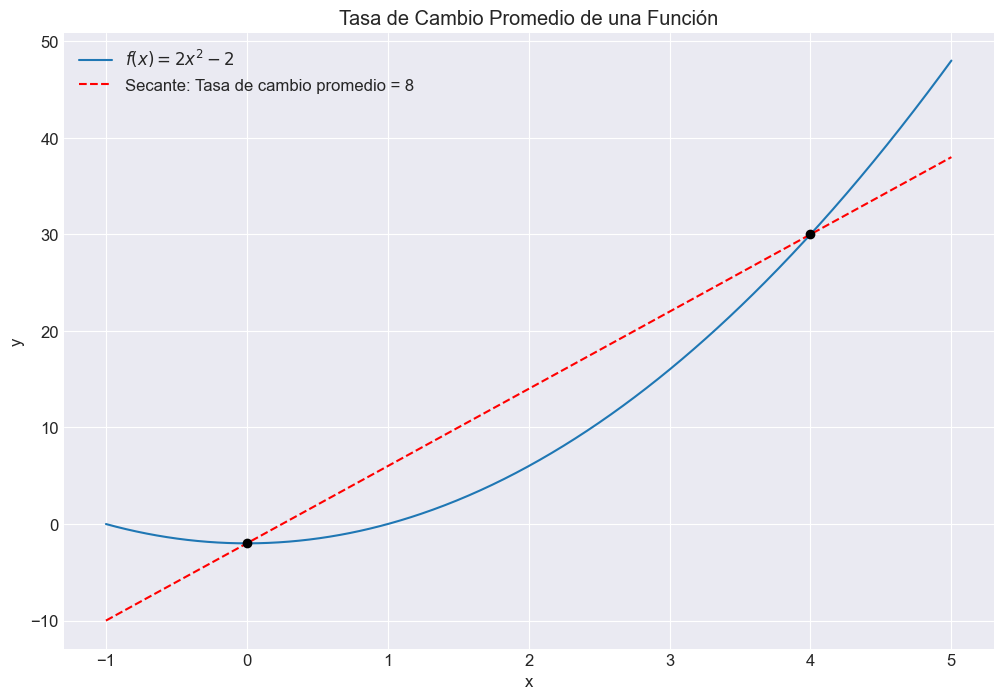

In [9]:
def average_rate_of_change_example():
    x = symbols('x')
    f = 2*x**2 - 2  # Función del ejemplo del PDF
    interval = [0, 4]  # Intervalo del ejemplo
    
    # Calcular tasa de cambio promedio
    f_a = f.subs(x, interval[0])
    f_b = f.subs(x, interval[1])
    avg_rate = (f_b - f_a)/(interval[1] - interval[0])
    
    print("\n=== Tasa de Cambio Promedio ===")
    print(f"Función: f(x) = {f}")
    print(f"Intervalo: [{interval[0]}, {interval[1]}]")
    print(f"f({interval[0]}) = {f_a}")
    print(f"f({interval[1]}) = {f_b}")
    print(f"\nTasa de cambio promedio = (f({interval[1]}) - f({interval[0]}))/({interval[1]} - {interval[0]})")
    print(f"= ({f_b} - {f_a})/{interval[1] - interval[0]}")
    print(f"= {avg_rate}")
    
    # Visualización
    x_vals = np.linspace(interval[0]-1, interval[1]+1, 500)
    f_lamb = sp.lambdify(x, f, 'numpy')
    
    plt.figure()
    plt.plot(x_vals, f_lamb(x_vals), label=f'$f(x) = {sp.latex(f)}$')
    
    # Línea secante que representa la tasa de cambio promedio
    secant = f_a + avg_rate*(x - interval[0])
    secant_lamb = sp.lambdify(x, secant, 'numpy')
    plt.plot(x_vals, secant_lamb(x_vals), 'r--', 
             label=f'Secante: Tasa de cambio promedio = {avg_rate}')
    
    plt.scatter([interval[0], interval[1]], [f_a, f_b], color='black', zorder=5)
    plt.title('Tasa de Cambio Promedio de una Función')
    plt.legend()
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

average_rate_of_change_example()

## Resumen Teórico Completo

| **Concepto**                | **Fórmula/Definición**                          | **Condiciones Importantes**                  |
|-----------------------------|------------------------------------------------|----------------------------------------------|
| **Línea Tangente**          | $y = f(a) + f'(a)(x - a)$                     | $f'(a)$ debe existir                        |
| **Línea Normal**            | $y = f(a) - \frac{1}{f'(a)}(x - a)$           | $f'(a) \neq 0$                              |
| **Tangentes Paralelas**     | $f'(a) = f'(b)$                               | Para algún $a \neq b$ en el dominio          |
| **Función Diferenciable**   | 1. Continua en $a$<br>2. $f'_-(a) = f'_+(a)$  | Ambas condiciones deben cumplirse            |
| **Tasa de Cambio Promedio** | $\frac{f(b) - f(a)}{b - a}$                   | $a \neq b$, función definida en $[a,b]$     |
